In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

In [2]:
import imblearn
import sys

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

print("pandas : {0}".format(pd.__version__))
print("numpy : {0}".format(np.__version__))
print("matplotlib : {0}".format(matplotlib.__version__))
print("seaborn : {0}".format(sns.__version__))
print("sklearn : {0}".format(sklearn.__version__))
print("imblearn : {0}".format(imblearn.__version__))

pandas : 2.2.2
numpy : 1.26.4
matplotlib : 3.7.5
seaborn : 0.12.2
sklearn : 1.2.2
imblearn : 0.12.4


In [3]:
# # Dataset field names
# datacols = ["duration","protocol_type","service","flag","src_bytes",
#     "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
#     "logged_in","num_compromised","root_shell","su_attempted","num_root",
#     "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
#     "is_host_login","is_guest_login","count","srv_count","serror_rate",
#     "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
#     "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
#     "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
#     "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
#     "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]



In [4]:
# real_df.columns

In [5]:
# Dataset field names
datacols = ["duration","protocol_type","service","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","attack"]



In [6]:


# Load NSL_KDD train dataset
dfkdd_train = pd.read_table("/kaggle/input/kdd-dataset/KDDTrain.csv", sep=",") # change path to where the dataset is located.
# dfkdd_train = dfkdd_train.iloc[:,:-1] # removes an unwanted extra field

# Load NSL_KDD test dataset
dfkdd_test = pd.read_table("/kaggle/input/kdd-dataset/KDDTest.csv", sep=",")
# dfkdd_test = dfkdd_test.iloc[:,:-1]

In [7]:
real_data = pd.read_csv('/kaggle/input/real-time-test-dataset/captured_packets.csv')
real_data = real_data[datacols[:-1]]
real_data.head(3)

,duration,protocol_type,service,src_bytes,dst_bytes,land,wrong_fragment,urgent
0,0.000000,tcp,http_443,109,109,0,0,0
1,0.000113,udp,domain_u,75,75,0,0,0
2,0.000043,tcp,http_443,1477,1477,0,0,0


In [8]:
dfkdd_test = dfkdd_test[datacols]
dfkdd_train = dfkdd_train[datacols]

In [9]:
dfkdd_test.head(3)

,duration,protocol_type,service,src_bytes,dst_bytes,land,wrong_fragment,urgent,attack
0,0,tcp,private,0,0,0,0,0,neptune
1,0,tcp,private,0,0,0,0,0,neptune
2,2,tcp,ftp_data,12983,0,0,0,0,normal


In [10]:
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }


In [11]:
dfkdd_train.columns

Index(['duration', 'protocol_type', 'service', 'src_bytes', 'dst_bytes',
       'land', 'wrong_fragment', 'urgent', 'attack'],
      dtype='object')

In [12]:
dfkdd_train.drop(dfkdd_train[dfkdd_train['attack']=='attack'].index, axis=0, inplace=True)
dfkdd_test.drop(dfkdd_test[dfkdd_test['attack']=='attack'].index, axis=0, inplace=True)

In [13]:
dfkdd_train['attack_class'] = dfkdd_train['attack'].apply(lambda v: mapping[v])

In [14]:
# Apply attack class mappings to the dataset

dfkdd_test['attack_class'] = dfkdd_test.attack.apply(lambda v: mapping[v])

In [15]:
# Drop attack field from both train and test data
dfkdd_train.drop(['attack'], axis=1, inplace=True)
dfkdd_test.drop(['attack'], axis=1, inplace=True)

In [16]:

# dfkdd_train['num_outbound_cmds'].value_counts()
# dfkdd_test['num_outbound_cmds'].value_counts()

In [17]:
# # 'num_outbound_cmds' field has all 0 values. Hence, it will be removed from both train and test dataset since it is a redundant field.
# dfkdd_train.drop(['num_outbound_cmds'], axis=1, inplace=True)
# dfkdd_test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [18]:
# Attack Class Distribution
attack_class_freq_train = dfkdd_train[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_test = dfkdd_test[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_train['frequency_percent_train'] = round((100 * attack_class_freq_train / attack_class_freq_train.sum()),2)
attack_class_freq_test['frequency_percent_test'] = round((100 * attack_class_freq_test / attack_class_freq_test.sum()),2)

attack_class_dist = pd.concat([attack_class_freq_train,attack_class_freq_test], axis=1) 
attack_class_dist

,attack_class,frequency_percent_train,attack_class,frequency_percent_test
attack_class,,,,
Normal,67343,53.46,9711,43.08
DoS,45927,36.46,7458,33.08
Probe,11656,9.25,2421,10.74
R2L,995,0.79,2754,12.22
U2R,52,0.04,200,0.89


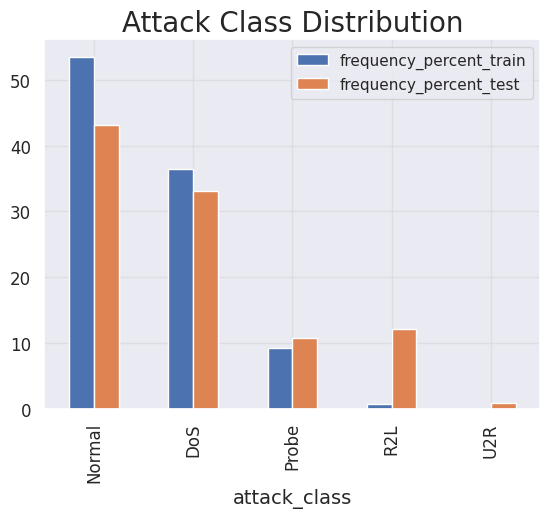

In [19]:
# Attack class bar plot
plot = attack_class_dist[['frequency_percent_train', 'frequency_percent_test']].plot(kind="bar");
plot.set_title("Attack Class Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);

In [20]:
dfkdd_train.head()

,duration,protocol_type,service,src_bytes,dst_bytes,land,wrong_fragment,urgent,attack_class
0,0,tcp,ftp_data,491,0,0,0,0,Normal
1,0,udp,other,146,0,0,0,0,Normal
2,0,tcp,private,0,0,0,0,0,DoS
3,0,tcp,http,232,8153,0,0,0,Normal
4,0,tcp,http,199,420,0,0,0,Normal


In [21]:

# Convert columns to numeric where possible
for col in dfkdd_train.columns:
    dfkdd_train[col] = pd.to_numeric(dfkdd_train[col], errors='ignore')

dfkdd_train.dtypes

duration           int64
protocol_type     object
service           object
src_bytes          int64
dst_bytes          int64
land               int64
wrong_fragment     int64
urgent             int64
attack_class      object
dtype: object

In [22]:
for col in dfkdd_test.columns:
    dfkdd_test[col] = pd.to_numeric(dfkdd_train[col], errors='ignore')

dfkdd_test.dtypes

duration           int64
protocol_type     object
service           object
src_bytes          int64
dst_bytes          int64
land               int64
wrong_fragment     int64
urgent             int64
attack_class      object
dtype: object

In [23]:
real_data.dropna(axis=0, inplace=True)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = dfkdd_train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(dfkdd_train.select_dtypes(include=['float64','int64']))
sc_test = scaler.transform(dfkdd_test.select_dtypes(include=['float64','int64']))
sc_real = scaler.transform(real_data.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)
sc_realdf = pd.DataFrame(sc_real, columns = cols)

In [25]:
# cattrain

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = dfkdd_train.select_dtypes(include=['object']).copy()
cattest = dfkdd_test.select_dtypes(include=['object']).copy()
catreal = real_data.select_dtypes(include=['object']).copy()

# encode the categorical attributes
# encoder.fit(cattrain)
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)
realcat = catreal.apply(encoder.fit_transform)

# separate target column from encoded data 
enctrain = traincat.drop(['attack_class'], axis=1)
enctest = testcat.drop(['attack_class'], axis=1)

cat_Ytrain = traincat[['attack_class']].copy()
cat_Ytest = testcat[['attack_class']].copy()

In [27]:
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter

# define columns and extract encoded train set for sampling 
sc_traindf = dfkdd_train.select_dtypes(include=['float64','int64'])
refclasscol = pd.concat([sc_traindf, enctrain], axis=1).columns
refclass = np.concatenate((sc_train, enctrain.values), axis=1)
X = refclass

# reshape target column to 1D array shape  
c, r = cat_Ytest.values.shape
y_test = cat_Ytest.values.reshape(c,)

c, r = cat_Ytrain.values.shape
y = cat_Ytrain.values.reshape(c,)

# apply the random over-sampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 67343, 0: 45927, 2: 11656, 3: 995, 4: 52})
Resampled dataset shape Counter({1: 67343, 0: 67343, 3: 67343, 2: 67343, 4: 67343})


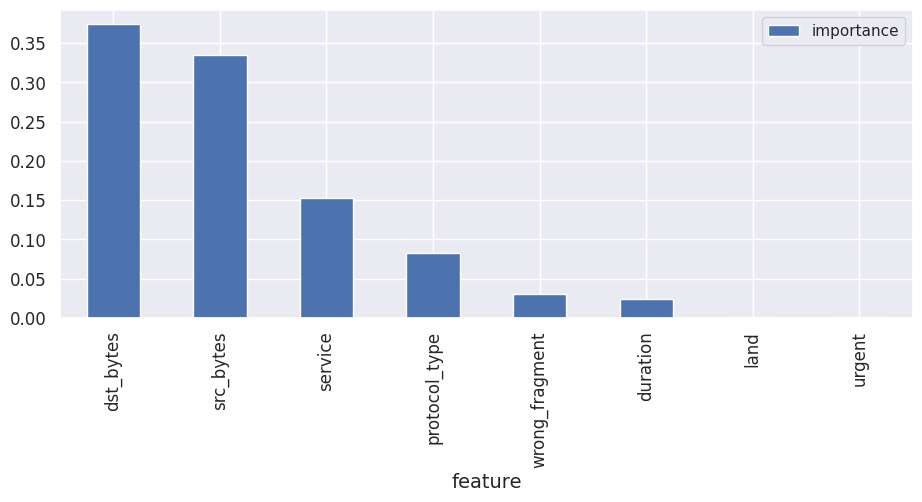

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2, random_state=0);

X_res, y_res = X, y

# fit random forest classifier on the training set
rfc.fit(X_res, y_res);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':refclasscol,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [29]:
from sklearn.feature_selection import RFE
import itertools

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=6)
rfe = rfe.fit(X_res, y_res)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), refclasscol)]
selected_features = [v for i, v in feature_map if i==True]

In [30]:
selected_features

['duration',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'protocol_type',
 'service']

In [31]:
# define columns to new dataframe
newcol = list(refclasscol)
newcol.append('attack_class')

# add a dimension to target
new_y_res = y_res[:, np.newaxis]

# create a dataframe from sampled data
res_arr = np.concatenate((X_res, new_y_res), axis=1)
res_df = pd.DataFrame(res_arr, columns = newcol) 

# create test dataframe
reftest = pd.concat([sc_testdf, testcat], axis=1)
refreal = pd.concat([sc_realdf, realcat], axis=1)
reftest['attack_class'] = reftest['attack_class'].astype(np.float64)
reftest['protocol_type'] = reftest['protocol_type'].astype(np.float64)
refreal['protocol_type'] = refreal['protocol_type'].astype(np.float64)
# reftest['flag'] = reftest['flag'].astype(np.float64)
reftest['service'] = reftest['service'].astype(np.float64)
refreal['service'] = refreal['service'].astype(np.float64)

res_df.shape
print(reftest.shape)
print(refreal.shape)

(22544, 9)
(50, 8)


In [32]:
reftest.head(3)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,protocol_type,service,attack_class
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,1.0,19.0,1.0
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,2.0,41.0,1.0
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,1.0,46.0,0.0


In [33]:
refreal.head(3)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,protocol_type,service
0,-0.110249,-0.007744,-0.004892,-0.014089,-0.089486,-0.007736,0.0,1.0
1,-0.110249,-0.007749,-0.004900,-0.014089,-0.089486,-0.007736,1.0,0.0
2,-0.110249,-0.007511,-0.004551,-0.014089,-0.089486,-0.007736,0.0,1.0


In [34]:
from collections import defaultdict
classdict = defaultdict(list)

# create two-target classes (normal class and an attack class)  
attacklist = [('DoS', 0.0), ('Probe', 2.0), ('R2L', 3.0), ('U2R', 4.0)]
normalclass = [('Normal', 1.0)]

def create_classdict():
    '''This function subdivides train and test dataset into two-class attack labels''' 
    for j, k in normalclass: 
        for i, v in attacklist: 
            restrain_set = res_df.loc[(res_df['attack_class'] == k) | (res_df['attack_class'] == v)]
            classdict[j +'_' + i].append(restrain_set)
            # test labels
            reftest_set = reftest.loc[(reftest['attack_class'] == k) | (reftest['attack_class'] == v)]
            classdict[j +'_' + i].append(reftest_set)
        
create_classdict()

In [35]:
for k, v in classdict.items():
    print(k)

Normal_DoS
Normal_Probe
Normal_R2L
Normal_U2R


In [36]:
pretrain = classdict['Normal_DoS'][0]
pretest = classdict['Normal_DoS'][1]
grpclass = 'Normal_DoS'

In [37]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

Xresdf = pretrain 
newtest = pretest

Xresdfnew = Xresdf[selected_features]
Xresdfnum = Xresdfnew.drop(['service'], axis=1)
Xresdfcat = Xresdfnew[['service']].copy()

Xtest_features = newtest[selected_features]
Xtestdfnum = Xtest_features.drop(['service'], axis=1)
Xtestcat = Xtest_features[['service']].copy()

Xreal_features = refreal[selected_features]
Xrealdfnum = Xreal_features.drop(['service'], axis=1)
Xrealcat = Xreal_features[['service']].copy()


# Fit train data
enc.fit(Xresdfcat)

# Transform train data
X_train_1hotenc = enc.transform(Xresdfcat).toarray()
       
# Transform test data
X_test_1hotenc = enc.transform(Xtestcat).toarray()

X_real_1hotenc = enc.transform(Xrealcat).toarray()

X_train = np.concatenate((Xresdfnum.values, X_train_1hotenc), axis=1)
X_test = np.concatenate((Xtestdfnum.values, X_test_1hotenc), axis=1) 
X_real = np.concatenate((Xrealdfnum.values, X_real_1hotenc), axis=1)

y_train = Xresdf[['attack_class']].copy()
c, r = y_train.values.shape
Y_train = y_train.values.reshape(c,)

y_test = newtest[['attack_class']].copy()
c, r = y_test.values.shape
Y_test = y_test.values.reshape(c,)

In [38]:
X_real[10]


array([-0.11 , -0.008, -0.005, -0.089,  0.   ,  0.   ,  0.   ,  1.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ])

In [39]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train);
            

In [40]:
from sklearn import metrics

models = []

models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} {} Model Evaluation =============================='.format(grpclass, i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Normal_DoS Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9395779994702922

Model Accuracy:
 0.9395779994702922

Confusion matrix:
 [[41608  4319]
 [ 2525 64818]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.94      0.91      0.92     45927
         1.0       0.94      0.96      0.95     67343

    accuracy                           0.94    113270
   macro avg       0.94      0.93      0.94    113270
weighted avg       0.94      0.94      0.94    113270



============================== Normal_DoS Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9861657985344751

Model Accuracy:
 0.9862629116270857

Confusion matrix:
 [[44625  1302]
 [  254 67089]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     45927
        

In [41]:
import joblib

# Save the trained Decision Tree Classifier
joblib.dump(DTC_Classifier, "anomaly_detection_model.pkl")

['anomaly_detection_model.pkl']

In [42]:
import joblib

# Load the model
model = joblib.load("anomaly_detection_model.pkl")  # Adjust path if necessary

# Print model details
print(model)


DecisionTreeClassifier(criterion='entropy', random_state=0)


In [43]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} {} Model Test Results =============================='.format(grpclass, i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Normal_DoS Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.7190961453256535

Confusion matrix:
 [[6392 1879]
 [3827 8215]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.63      0.77      0.69      8271
         1.0       0.81      0.68      0.74     12042

    accuracy                           0.72     20313
   macro avg       0.72      0.73      0.72     20313
weighted avg       0.74      0.72      0.72     20313



============================== Normal_DoS Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.9392014965785458

Confusion matrix:
 [[ 7609   662]
 [  573 11469]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.93      0.92      0.92      8271
         1.0       0.95      0.95      0.95     12042

    accuracy                           0.94     20313

In [44]:
X_test[0]

array([-0.11 , -0.008, -0.005, -0.089,  1.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ])

In [45]:
for i, v in models:
    res = v.predict(X_real)

In [46]:
res

array([0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [47]:
# res = res.reshape(-1, 1)